In [1]:
#goals
#perform data analysis on conservation status species 
# and investigate if there are any patterns or themes to the types of species that become endangered

#actions
#data analysis, data visualization,

#data 
#observations, species inforamtions

#analysis
#i don't know what to say here honestly.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
observations = pd.read_csv('observations.csv')
species_info = pd.read_csv('species_info.csv')
sns.set_style('darkgrid')

In [4]:
display(observations)
display(species_info.head())

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
...,...,...,...
23291,Croton monanthogynus,Yosemite National Park,173
23292,Otospermophilus beecheyi,Bryce National Park,130
23293,Heterotheca sessiliflora ssp. echioides,Bryce National Park,140
23294,Dicranella rufescens,Yosemite National Park,171


,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [39]:
#print(observations.park_name.unique())
print("number of species: " + str(species_info.scientific_name.nunique()))
print(species_info.conservation_status.unique())
print(species_info.conservation_status.value_counts(dropna = False))

number of species: 5541
[nan 'Species of Concern' 'Endangered' 'Threatened' 'In Recovery']
NaN                   5633
Species of Concern     161
Endangered              16
Threatened              10
In Recovery              4
Name: conservation_status, dtype: int64


In [52]:
#distribution of conservation_status
total_species = len(species_info)
not_protected_species = len(species_info.conservation_status) - species_info['conservation_status'].notnull().sum()
protected_species = species_info['conservation_status'].notnull().sum()
print('Total Species: ' + str(total_species))
percentage_not_protected = not_protected_species/total_species *100
print('Not Protected Species: ' + str(not_protected_species) + ' or rather ' + str(percentage_not_protected) + '%')
percentage_protected = protected_species/total_species *100
print('Protected Species: ' + str(protected_species) + ' or rather ' + str(percentage_protected) + '%')



Total Species: 5824
Not Protected Species: 5633 or rather 96.72046703296702%
Protected Species: 191 or rather 3.279532967032967%


Text(0.5, 1.0, 'Distribution of conservation status')

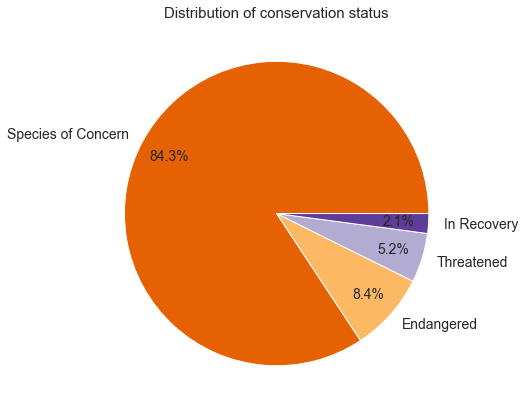

In [6]:
#distribution of conservation_status

plt.figure(figsize = (12,7))
##plt.pie(x = species_info.conservation_status.value_counts(dropna = False), labels = species_info.conservation_status.unique())
#This doesn't work because most of the species are not endangered(96.7%) which makes graph unreadable.
colors = sns.color_palette(['#e66101','#fdb863','#b2abd2','#5e3c99'])
labels = ['Species of Concern','Endangered','Threatened','In Recovery']
plt.pie(x = species_info.conservation_status.value_counts(), labels = labels, colors = colors\
        , autopct='%.1f%%', pctdistance = 0.8, textprops={'fontsize': 14})
plt.title('Distribution of conservation status', fontsize = 15)
#We can observe that most of the species are not endangered and they present 96.7% population. If we disregard non-endangered
#species we can see that just 8.4% of the population is endangered and 84.3% are species of concern.

Text(0.5, 1.0, 'Which species are more likely to be endangered (wrong aproach)?')

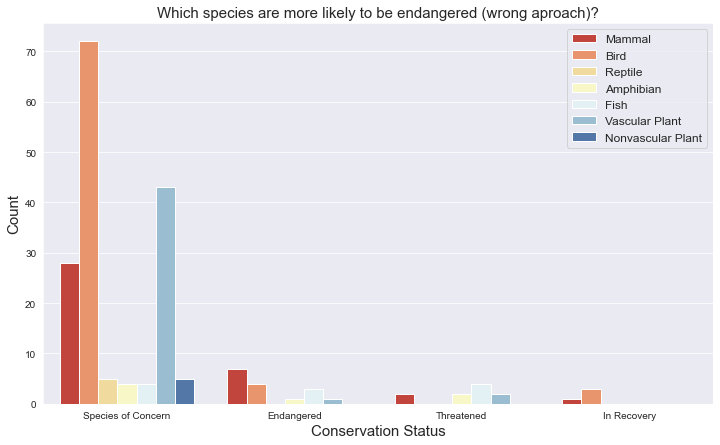

In [7]:
#Are certain types of species  more likely to be endangered?
plt.figure(figsize = (12,7))
colors = ['#d73027','#fc8d59','#fee090','#ffffbf','#e0f3f8','#91bfdb','#4575b4']
ax = sns.countplot(data = species_info, x = 'conservation_status', palette = colors, hue = 'category')
plt.legend(loc = 1, fontsize = 'large')
ax.set_ylabel('Count', fontsize = 15)
ax.set_xlabel('Conservation Status', fontsize = 15)
ax.set_title('Which species are more likely to be endangered (wrong aproach)?', fontsize = 15)

False    5633
True      191
Name: is_protected, dtype: int64


<AxesSubplot:xlabel='is_protected', ylabel='count'>

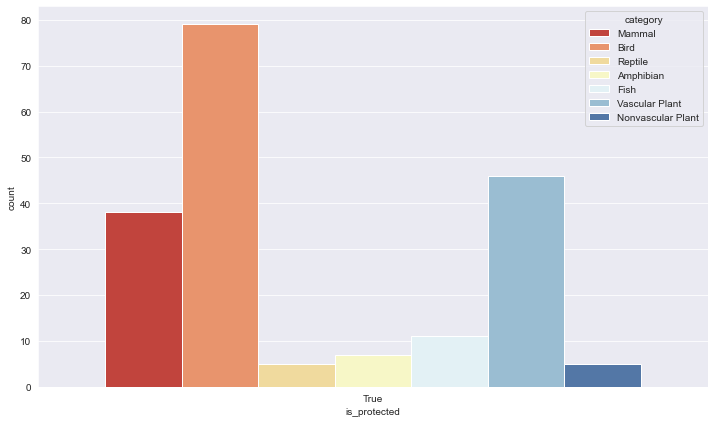

In [8]:
######This graph is really hard to read, lets plot overall yes or not to their protection status
plt.figure(figsize = (12,7))
species_info['is_protected'] = species_info['conservation_status'].notnull()
print(species_info['is_protected'].value_counts())
sns.countplot(data = species_info[species_info.is_protected == True], x = 'is_protected', palette = colors, hue = 'category')

In [9]:
#This graph is easier to read but still we cannot say that certain species are more likely to be endangered.
category_groups_count = species_info.groupby(['category', 'is_protected']).scientific_name.nunique().reset_index().pivot(index = 'category', columns = 'is_protected', values = 'scientific_name')\
.reset_index()
category_groups_count.columns = (['category', 'not_protected', 'is_protected'])
category_groups_count['percentage_protected'] = category_groups_count.is_protected / (category_groups_count.is_protected + category_groups_count.not_protected)
display(category_groups_count)

,category,not_protected,is_protected,percentage_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


Text(0.5, 0, 'Species')

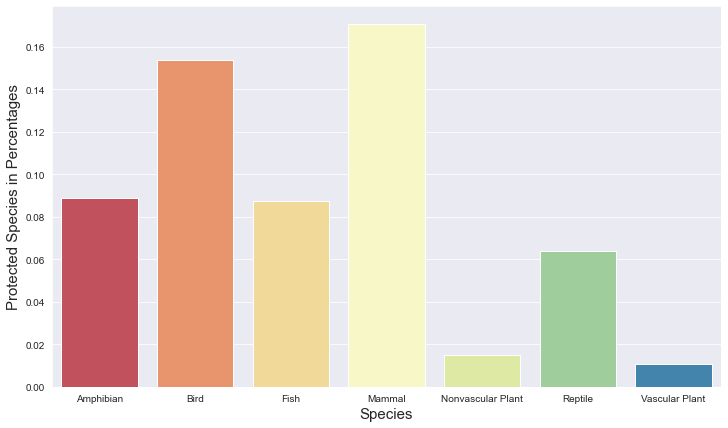

In [13]:
##make graph
plt.figure(figsize = (12,7))
palette = ['#d53e4f','#fc8d59','#fee08b','#ffffbf','#e6f598','#99d594','#3288bd']
ax = sns.barplot(data = category_groups_count, x = 'category', y = 'percentage_protected', palette = palette)
ax.set_ylabel('Protected Species in Percentages', fontsize = 15)
ax.set_xlabel('Species', fontsize = 15)
ax.set_title('')

In [15]:
#Are the differences between species and their conservation status significant?
#To check this we have to perform a chi_square test which will tell us p-value,
#then we will compare it to our significance threshold (0.05).
#made function to check this automatically:)

In [53]:
from scipy.stats import chi2_contingency
table = [[30, 146],
        [75, 413]]
display(category_groups_count)
def status_conservation_check(name1, name2):
    not_protected1 = category_groups_count.not_protected[category_groups_count.category == name1]
    protected1 = category_groups_count.is_protected[category_groups_count.category == name1]
    not_protected2 = category_groups_count.not_protected[category_groups_count.category == name2]
    protected2 = category_groups_count.is_protected[category_groups_count.category == name2]
    table = [[not_protected1, protected1],
            [not_protected2, protected2]]
    chi2, pval, dof, expected = chi2_contingency(table)
    print(pval)
status_conservation_check('Nonvascular Plant', 'Fish')



,category,not_protected,is_protected,percentage_protected
0,Amphibian,72,7,0.088608
1,Bird,413,75,0.153689
2,Fish,115,11,0.087302
3,Mammal,146,30,0.170455
4,Nonvascular Plant,328,5,0.015015
5,Reptile,73,5,0.064103
6,Vascular Plant,4216,46,0.010793


0.0004960633228752842


## Conclusions

 - What's Distribution of conservation status for species?
   - Vast majority of species were not protected(96.7%)
 - Are certain types of species  more likely to be endangered?
   - Mammals and Birds are most likely to be endangered.
 - Are the differences between species and their conservation status significant?
   - There are few combinations of species and their conservation status which are significant.
 